## **Healthcare Performance Contuniuum Exploratory Data Analysis** ##

<hr style="margin-bottom: 40px;">
<img src="hospital.jpg" alt="Hospital Image" style="width:400px; float: right; margin: 0 40px 40px 40px;"/>


#### **Prepared by: Yussuf Ahmed**  
End-to-end EDA on **Patients**, **Readmissions**, and **Hospital Operations** datasets.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Hands on!** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
patients = pd.read_csv('Cleaned patients.csv', parse_dates=['Admission_Date', 'Discharge_Date'])
patients.head()

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Condition,Diagnosis_Code,Admission_Department,Admission_Date,Discharge_Date,Length_of_Stay,First_Time_Visit
0,1.0,62.0,Female,Private,Heart Disease,I38.2,General Medicine,2024-11-23,2024-11-28,5,0
1,2.0,51.0,Male,Private,Heart Disease,I87.0,Surgery,2024-10-27,2024-11-02,6,0
2,3.0,43.0,Male,Self-pay,NaN,I30.6,Emergency,2023-06-09,2023-06-12,3,1
3,4.0,44.0,Male,Private,Kidney Disease,I43.0,General Medicine,2024-07-03,2024-07-08,5,1
4,5.0,41.0,Male,Government,NaN,I56.9,Emergency,2023-03-13,2023-03-17,4,1


In [4]:
readmission = pd.read_csv('Cleaned readmissions.csv', parse_dates=['Readmission_Date'])
readmission.head()

,Patient_ID,Readmitted,Readmission_Date,Days_Before_Readmission,Reason_For_Readmission,Previous_Risk_Score
0,1861.0,1,2025-01-29,108,Infection,9
1,354.0,1,2024-12-26,55,Infection,10
2,1334.0,1,2024-06-07,63,Other,5
3,906.0,1,2024-09-14,27,Other,5
4,1290.0,1,2023-07-25,69,Infection,10


In [22]:
operations = pd.read_csv('hospital_operations.csv')
operations.head()

,Department,Bed_Capacity,Beds_Occupied,Staff_Count,Avg_Wait_Time_Minutes,Avg_Treatment_Time_Minutes,Discharge_Delays
0,Cardiology,42,22,60,49,77,5
1,Emergency,64,51,69,18,70,4
2,Surgery,51,26,72,12,74,5
3,General Medicine,42,28,21,45,142,6
4,Pulmonology,41,31,82,49,85,5


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **The Data at a Glance**

#### *1. patient table*

In [6]:
patients.shape

(2000, 11)

In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            2000 non-null   float64       
 1   Age                   2000 non-null   float64       
 2   Gender                2000 non-null   object        
 3   Insurance_Type        2000 non-null   object        
 4   Chronic_Condition     1503 non-null   object        
 5   Diagnosis_Code        2000 non-null   object        
 6   Admission_Department  2000 non-null   object        
 7   Admission_Date        2000 non-null   datetime64[ns]
 8   Discharge_Date        2000 non-null   datetime64[ns]
 9   Length_of_Stay        2000 non-null   int64         
 10  First_Time_Visit      2000 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 172.0+ KB


In [10]:
patients['Chronic_Condition'].value_counts()

Chronic_Condition
Hypertension      402
Heart Disease     354
Diabetes          299
Kidney Disease    243
COPD              205
Name: count, dtype: int64

In [16]:
# Impute the missing NaN values with the string 'None'
patients['Chronic_Condition'].fillna('None', inplace=True)

# Check the total non-null count (should now be 2000)
print(patients.info())

# Check the new count of the 'None' category
print(patients['Chronic_Condition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            2000 non-null   float64       
 1   Age                   2000 non-null   float64       
 2   Gender                2000 non-null   object        
 3   Insurance_Type        2000 non-null   object        
 4   Chronic_Condition     2000 non-null   object        
 5   Diagnosis_Code        2000 non-null   object        
 6   Admission_Department  2000 non-null   object        
 7   Admission_Date        2000 non-null   datetime64[ns]
 8   Discharge_Date        2000 non-null   datetime64[ns]
 9   Length_of_Stay        2000 non-null   int64         
 10  First_Time_Visit      2000 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 172.0+ KB
None
Chronic_Condition
None              497
Hypertensio

In [17]:
patients.describe()

,Patient_ID,Age,Admission_Date,Discharge_Date,Length_of_Stay,First_Time_Visit
count,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000
mean,1000.500000,54.192521,2024-01-01 08:57:50.399999744,2024-01-07 01:17:02.400000,5.680000,0.293000
min,1.000000,0.000000,2023-01-01 00:00:00,2023-01-04 00:00:00,1.000000,0.000000
25%,500.750000,43.000000,2023-07-03 18:00:00,2023-07-08 18:00:00,4.000000,0.000000
50%,1000.500000,54.192521,2023-12-27 00:00:00,2024-01-03 12:00:00,6.000000,0.000000
75%,1500.250000,65.000000,2024-07-06 00:00:00,2024-07-12 06:00:00,7.000000,1.000000
max,2000.000000,100.000000,2024-12-31 00:00:00,2025-01-08 00:00:00,14.000000,1.000000
std,577.494589,17.660826,NaN,NaN,2.151259,0.455252


#### *2. readmission table*

In [19]:
readmission.shape

(500, 6)

In [20]:
readmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               500 non-null    float64       
 1   Readmitted               500 non-null    int64         
 2   Readmission_Date         500 non-null    datetime64[ns]
 3   Days_Before_Readmission  500 non-null    int64         
 4   Reason_For_Readmission   500 non-null    object        
 5   Previous_Risk_Score      500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 23.6+ KB


In [21]:
readmission.describe()

,Patient_ID,Readmitted,Readmission_Date,Days_Before_Readmission,Previous_Risk_Score
count,500.000000,500.0,500,500.000000,500.000000
mean,993.220000,1.0,2024-03-26 19:52:19.200000,61.576000,7.780000
min,3.000000,1.0,2023-02-02 00:00:00,5.000000,2.000000
25%,464.500000,1.0,2023-09-24 06:00:00,33.000000,7.000000
50%,974.500000,1.0,2024-04-04 00:00:00,59.000000,8.000000
75%,1522.000000,1.0,2024-10-05 06:00:00,93.000000,10.000000
max,1999.000000,1.0,2025-04-24 00:00:00,120.000000,10.000000
std,583.342912,0.0,NaN,34.233552,1.948125


#### *3. Hospiatl Operations table*

In [23]:
operations.shape

(6, 7)

In [24]:
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Department                  6 non-null      object
 1   Bed_Capacity                6 non-null      int64 
 2   Beds_Occupied               6 non-null      int64 
 3   Staff_Count                 6 non-null      int64 
 4   Avg_Wait_Time_Minutes       6 non-null      int64 
 5   Avg_Treatment_Time_Minutes  6 non-null      int64 
 6   Discharge_Delays            6 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 468.0+ bytes


In [25]:
operations.describe()

,Bed_Capacity,Beds_Occupied,Staff_Count,Avg_Wait_Time_Minutes,Avg_Treatment_Time_Minutes,Discharge_Delays
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000
mean,50.833333,34.500000,56.833333,37.000000,93.00000,4.833333
std,11.196726,12.373358,23.232879,17.216271,27.92848,0.752773
min,41.000000,22.000000,21.000000,12.000000,70.00000,4.000000
25%,42.000000,26.500000,42.750000,24.750000,74.75000,4.250000
50%,46.500000,29.500000,64.500000,47.000000,81.00000,5.000000
75%,60.750000,44.500000,71.250000,49.000000,103.75000,5.000000
max,65.000000,51.000000,82.000000,49.000000,142.00000,6.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **1. Patient Demographics**

##### 1. What is the overall volume of patients served during this period?

In [33]:
# Calculate the total number of patients served, which is the total number of rows.
total_patients_served = patients.shape[0]

print(f"The overall volume of patients served during this period is: {total_patients_served}")

The overall volume of patients served during this period is: 2000


##### 2. How efficiently are we managing patient stays, and is our average duration meeting targets?

In [31]:
# Calculate the overall average Length of Stay
average_los = patients['Length_of_Stay'].mean()

print(f"The overall average Length of Stay (LoS) is: {average_los:.2f} days.")

The overall average Length of Stay (LoS) is: 5.68 days.


##### 3. What is our new patient acquisition rate, and what proportion of our patients are using our services for the first time?

In [30]:
# 1. Get the raw counts and normalize to get proportions
visit_proportions = patients['First_Time_Visit'].value_counts(normalize=True)

# 2. Extract the proportion for first-time visitors (where the value is 1)
new_patient_proportion = visit_proportions.get(1, 0)

# 3. Calculate the percentage
new_patient_acquisition_rate = new_patient_proportion * 100

print(f"The proportion of patients using our services for the first time is: {new_patient_acquisition_rate:.2f}%")
print(f"This represents the patient acquisition rate during this period.")

The proportion of patients using our services for the first time is: 29.30%
This represents the patient acquisition rate during this period.


##### 4. How is patient demand changing over time?

In [37]:
# 1. Create columns for Year and Month (as a number)
patients['Year'] = patients['Admission_Date'].dt.year
patients['Month'] = patients['Admission_Date'].dt.month

# 2. Group the data by Year and Month to get the patient count (demand)
# This creates a MultiIndex Series
demand_by_year_month = patients.groupby(['Year', 'Month'])['Patient_ID'].count()

# 3. Unstack the data to get months (1-12) as rows and years (2023, 2024) as columns
# This format is perfect for plotting yearly lines side-by-side
demand_pivot = demand_by_year_month.unstack(level='Year')

print("--- Data Pivot (Demand by Month and Year) ---")
print(demand_pivot)

--- Data Pivot (Demand by Month and Year) ---
Year   2023  2024
Month            
1        79    83
2        85    85
3        89    80
4        79    71
5        82    83
6        76    67
7        96    86
8        82    92
9        71    88
10       79   101
11       86    86
12      104    70


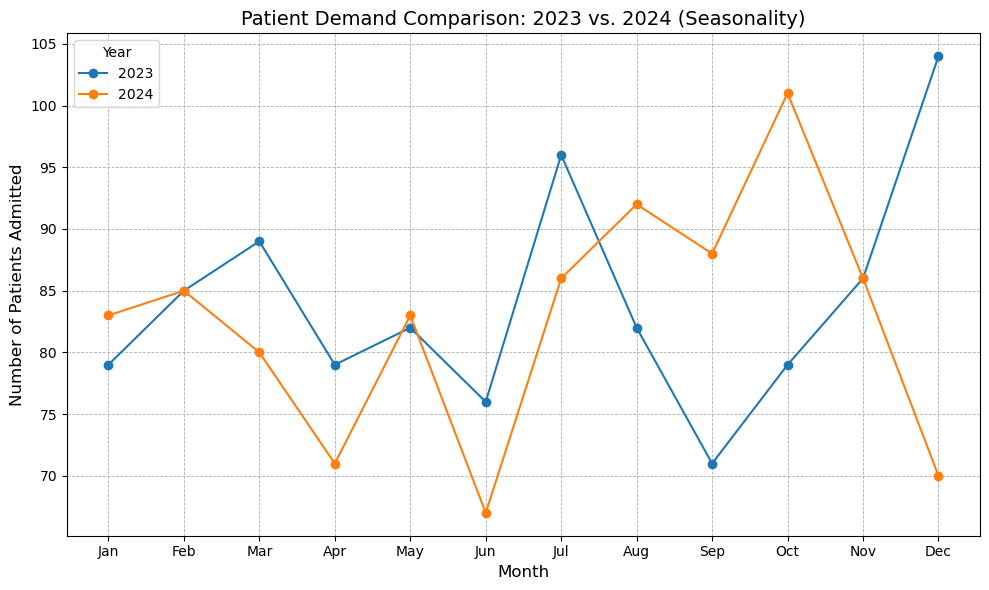

In [38]:
plt.figure(figsize=(10, 6))

# Plot the pivoted DataFrame. Pandas plots each column (Year) as a separate line.
demand_pivot.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())

# Set custom month names for the X-axis for better readability
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Add titles and legend
plt.title('Patient Demand Comparison: 2023 vs. 2024 (Seasonality)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Patients Admitted', fontsize=12)

# Set the Legend title
plt.legend(title='Year', fontsize=10)
plt.grid(True, which='major', linestyle='--', linewidth=0.6)
plt.tight_layout()

plt.show()

##### 5. Which departments are experiencing the highest workload and require the most immediate resource allocation?

In [40]:
# Group by department and calculate workload metrics
department_workload = patients.groupby('Admission_Department').agg(
    Total_Admissions=('Patient_ID', 'count'),         # Volume workload
    Total_Length_of_Stay=('Length_of_Stay', 'sum'),   # Intensity workload (Total resource days used)
    Average_Length_of_Stay=('Length_of_Stay', 'mean') # Contextual LoS
).reset_index()

# Sort to identify the top departments by Volume
top_volume = department_workload.sort_values(by='Total_Admissions', ascending=False).head(5)

# Sort to identify the top departments by Intensity
top_intensity = department_workload.sort_values(by='Total_Length_of_Stay', ascending=False).head(5)

print("--- Top 5 Departments by Patient Volume (Workload) ---")
print(top_volume.set_index('Admission_Department'))

--- Top 5 Departments by Patient Volume (Workload) ---
                      Total_Admissions  Total_Length_of_Stay  \
Admission_Department                                           
Emergency                          497                  2813   
General Medicine                   409                  2262   
Cardiology                         397                  2234   
Surgery                            286                  1713   
Pulmonology                        215                  1220   

                      Average_Length_of_Stay  
Admission_Department                          
Emergency                           5.659960  
General Medicine                    5.530562  
Cardiology                          5.627204  
Surgery                             5.989510  
Pulmonology                         5.674419  


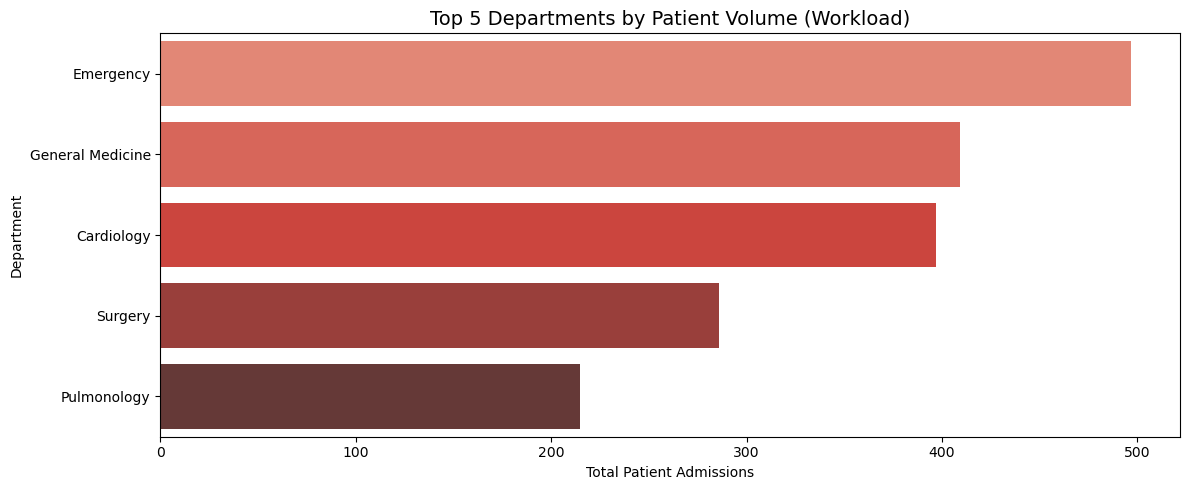

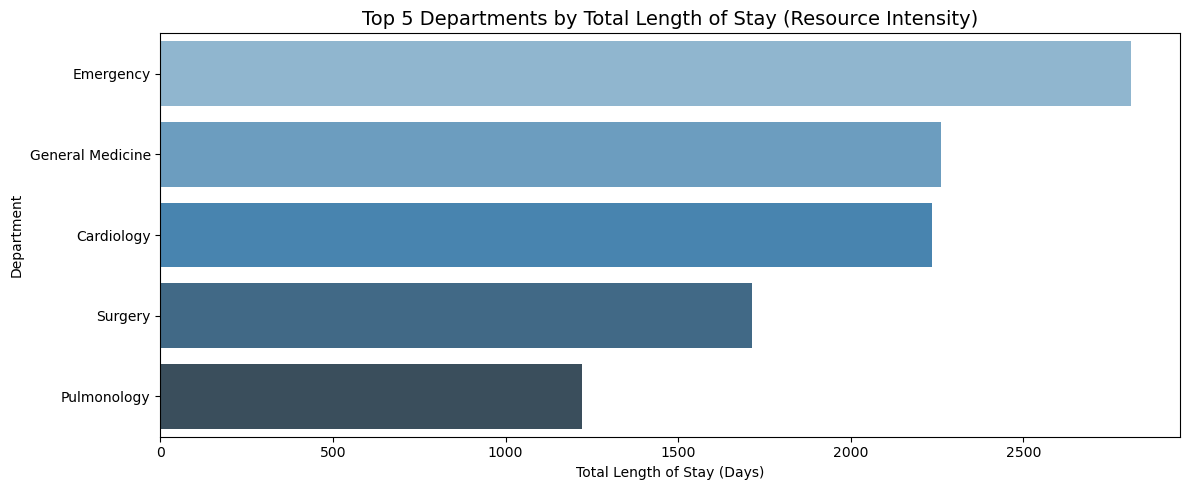

In [45]:
# Plot 1: Admissions Volume (Workload) - FIX APPLIED
plt.figure(figsize=(12, 5))
sns.barplot(
    x='Total_Admissions',
    y='Admission_Department',
    data=top_volume,
    palette='Reds_d',
    # --- FIX START ---
    hue='Admission_Department', # Tells Seaborn which variable to color by
    legend=False               # Hides the unnecessary legend
    # --- FIX END ---
)
plt.title('Top 5 Departments by Patient Volume (Workload)', fontsize=14)
plt.xlabel('Total Patient Admissions')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

# Plot 2: Total Intensity (Total Length of Stay) - FIX APPLIED
plt.figure(figsize=(12, 5))
sns.barplot(
    x='Total_Length_of_Stay',
    y='Admission_Department',
    data=top_intensity,
    palette='Blues_d',
    # --- FIX START ---
    hue='Admission_Department', # Tells Seaborn which variable to color by
    legend=False               # Hides the unnecessary legend
    # --- FIX END ---
)
plt.title('Top 5 Departments by Total Length of Stay (Resource Intensity)', fontsize=14)
plt.xlabel('Total Length of Stay (Days)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

#### 6. Which departments are outliers in patient throughput efficiency, indicating a need for investigation into their discharge processes?

In [41]:
# 1. Calculate ALoS per department and overall ALoS
department_efficiency = patients.groupby('Admission_Department')['Length_of_Stay'].agg(
    Average_LoS='mean',
    Median_LoS='median',
    Patient_Count='count'
).reset_index()

overall_average_los = patients['Length_of_Stay'].mean()

print(f"Overall Average Length of Stay (Baseline): {overall_average_los:.2f} days")

# Define a simple threshold for quick investigation (e.g., 15% above the overall average)
investigation_threshold = overall_average_los * 1.15

potential_outliers = department_efficiency[department_efficiency['Average_LoS'] > investigation_threshold]

print("\n--- Departments Flagged for Discharge Investigation ---")
print(f"Threshold for Flagging: ALoS > {investigation_threshold:.2f} days")

if not potential_outliers.empty:
    print(potential_outliers[['Admission_Department', 'Average_LoS', 'Patient_Count']].set_index('Admission_Department').sort_values(by='Average_LoS', ascending=False))
else:
    print("No departments were found to have an Average LoS more than 15% above the overall average.")

Overall Average Length of Stay (Baseline): 5.68 days

--- Departments Flagged for Discharge Investigation ---
Threshold for Flagging: ALoS > 6.53 days
No departments were found to have an Average LoS more than 15% above the overall average.


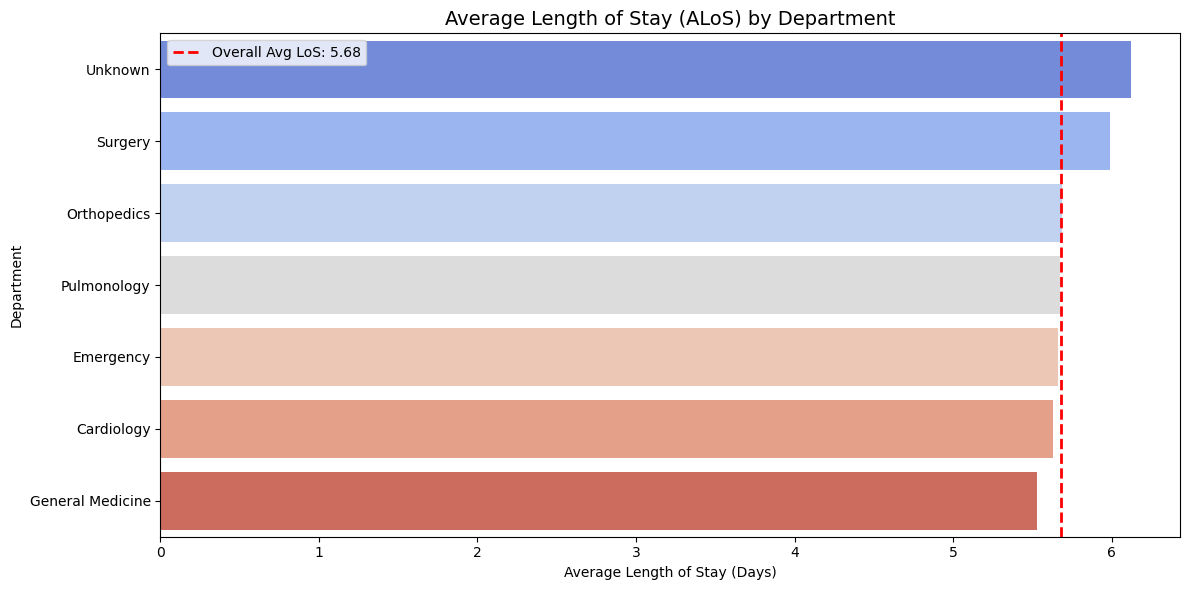

In [43]:
plt.figure(figsize=(12, 6))

# Sort the data by ALoS (highest at the top)
plot_data = department_efficiency.sort_values(by='Average_LoS', ascending=False)

sns.barplot(
    x='Average_LoS',
    y='Admission_Department',
    data=plot_data,
    palette='coolwarm',
    # --- FIX START ---
    hue='Admission_Department', # Assign the y-variable to hue
    legend=False               # Turn off the redundant legend
    # --- FIX END ---
)
# Add the overall average line
plt.axvline(overall_average_los, color='red', linestyle='--', linewidth=2, label=f'Overall Avg LoS: {overall_average_los:.2f}')

plt.title('Average Length of Stay (ALoS) by Department', fontsize=14)
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()
plt.show()

##### 7. What is the current distribution of our patient payer mix, and what are the potential financial implications for our revenue cycle?

--- Current Patient Payer Mix Distribution ---
                Count  Proportion (%)
Insurance_Type                       
Private           894            44.7
Government        822            41.1
Self-pay          284            14.2


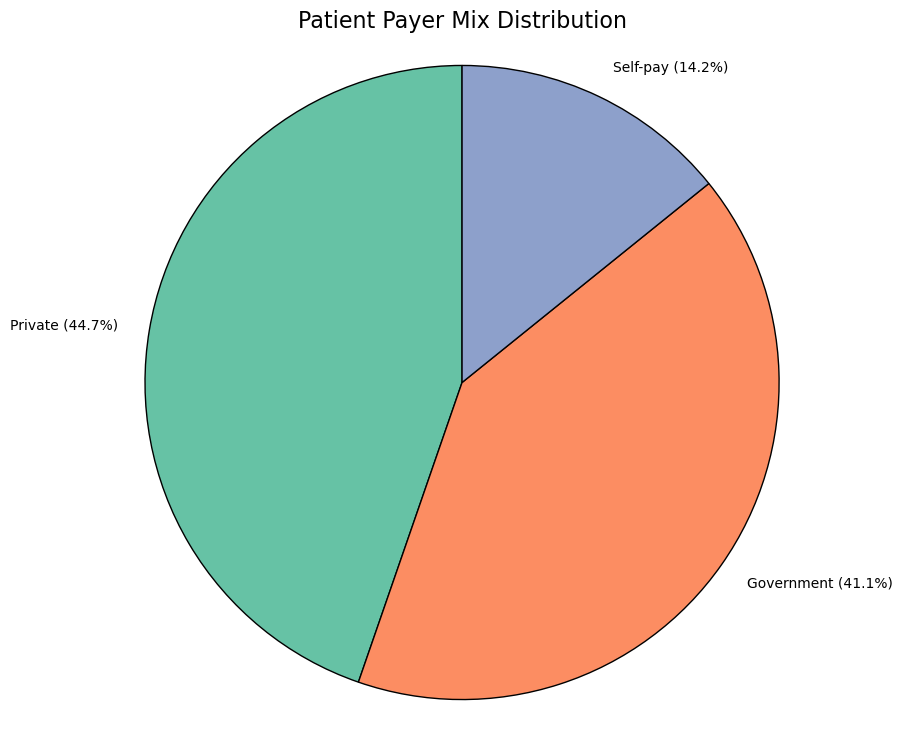

In [46]:
# Calculate the distribution (payer mix) and format as percentages
payer_mix_proportions = patients['Insurance_Type'].value_counts(normalize=True) * 100

# Combine raw counts and proportions into a clear DataFrame
payer_mix_df = pd.DataFrame({
    'Count': patients['Insurance_Type'].value_counts(),
    'Proportion (%)': payer_mix_proportions.round(2)
})

print("--- Current Patient Payer Mix Distribution ---")
print(payer_mix_df)

# -----------------------------------------------------
# Visualization: Pie Chart
# -----------------------------------------------------
plt.figure(figsize=(9, 9))

# Plot the distribution
plt.pie(
    payer_mix_proportions,
    labels=[f'{idx} ({val:.1f}%)' for idx, val in payer_mix_proportions.items()], # Labels include name and percentage
    autopct=None, # Already included in labels
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Patient Payer Mix Distribution', fontsize=16)
plt.axis('equal') # Ensures the pie chart is round
plt.show()

##### 8. What are the most prevalent chronic conditions treated at our facility?

--- Top 10 Most Prevalent Chronic Conditions ---
Chronic_Condition
Hypertension      402
Heart Disease     354
Diabetes          299
Kidney Disease    243
COPD              205
Name: count, dtype: int64


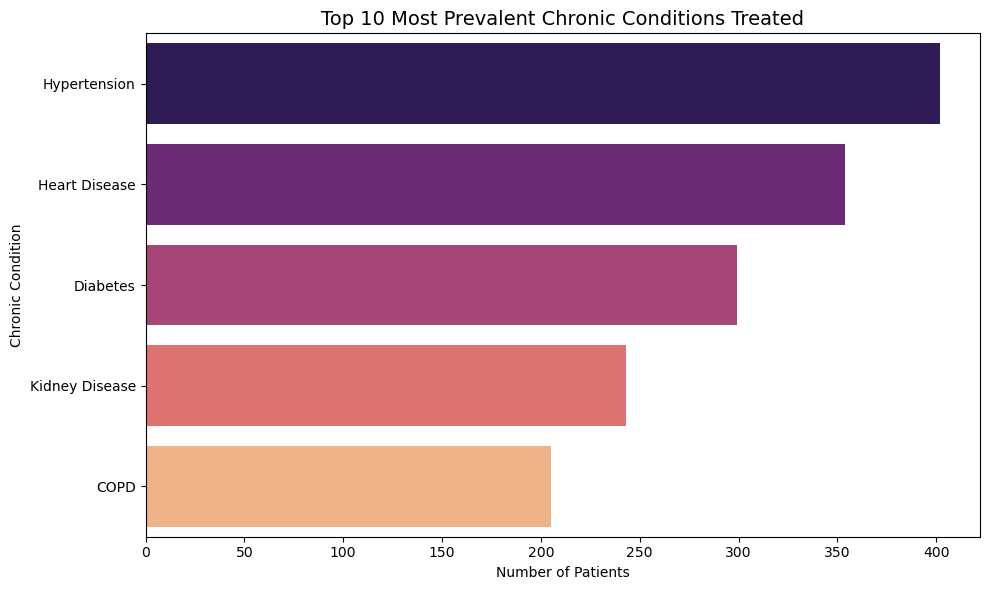

In [47]:
# 1. Calculate the raw counts of all conditions
condition_counts = patients['Chronic_Condition'].value_counts()

# 2. Filter out the 'None' category (which represents 'No Chronic Condition')
# We check if 'None' is present before dropping it
if 'None' in condition_counts.index:
    diagnosed_conditions = condition_counts.drop(labels=['None'])
else:
    diagnosed_conditions = condition_counts

# 3. Select the top 10 for focused resource planning
top_conditions = diagnosed_conditions.head(10)

print("--- Top 10 Most Prevalent Chronic Conditions ---")
print(top_conditions)

# 4. Visualization: Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_conditions.values,
    y=top_conditions.index,
    palette='magma',
    # Fix for Seaborn FutureWarning
    hue=top_conditions.index,
    legend=False
)

plt.title('Top 10 Most Prevalent Chronic Conditions Treated', fontsize=14)
plt.xlabel('Number of Patients')
plt.ylabel('Chronic Condition')
plt.tight_layout()
plt.show()

##### 9. What is the typical age profile of our patients?

In [48]:
# Calculate Age Profile Summary Statistics
age_profile = patients['Age'].describe()
mean_age = age_profile['mean']
median_age = age_profile['50%']

print("--- Patient Age Profile Summary Statistics ---")
print(age_profile)

--- Patient Age Profile Summary Statistics ---
count    2000.000000
mean       54.192521
std        17.660826
min         0.000000
25%        43.000000
50%        54.192521
75%        65.000000
max       100.000000
Name: Age, dtype: float64


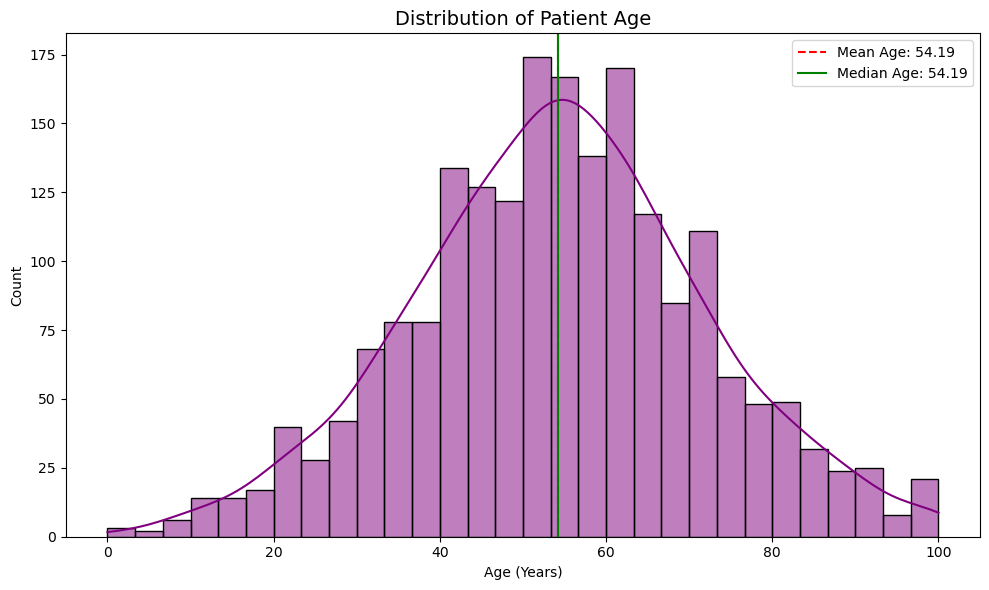

In [49]:
# Visualization: Histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(
    patients['Age'],
    bins=30, # Use 30 bins for detailed view
    kde=True, # Shows the smooth distribution curve
    color='purple',
    edgecolor='black'
)

# Add lines for mean and median
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median Age: {median_age:.2f}')

plt.title('Distribution of Patient Age', fontsize=14)
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **2. Patient Readmission Risk**

##### 1. What is our current readmission rate, and are we meeting our quality targets (Red/Green indicator)?

In [51]:
# 1. Calculate the total number of patients
total_patients = patients.shape[0]

# 2. Count the number of readmitted patients (where the value is 1)
readmitted_patients = readmission['Readmitted'].sum() 

# 3. Calculate the rate
readmission_rate = (readmitted_patients / total_patients) * 100

print(f"Total Patient Volume: {total_patients}")
print(f"Total Readmitted Patients: {readmitted_patients}")
print(f"Current Readmission Rate: {readmission_rate:.2f}%")

Total Patient Volume: 2000
Total Readmitted Patients: 500
Current Readmission Rate: 25.00%


In [52]:
TARGET_RATE = 12.5 

print("\n--- Quality Target Evaluation ---")

if readmission_rate <= TARGET_RATE:
    print(f"✅ GREEN: Target Met!")
    print(f"The rate ({readmission_rate:.2f}%) is at or below the target of {TARGET_RATE:.2f}%.")
else:
    print(f"❌ RED: Target Missed!")
    print(f"The rate ({readmission_rate:.2f}%) exceeds the target of {TARGET_RATE:.2f}%. Immediate investigation is required.")


--- Quality Target Evaluation ---
❌ RED: Target Missed!
The rate (25.00%) exceeds the target of 12.50%. Immediate investigation is required.


##### 2. What is the total number of patients who have been readmitted during this period?

In [53]:
# Count the number of readmitted patients (where the value is 1)
total_readmitted_patients = readmission['Readmitted'].sum()

print(f"The total number of patients who have been readmitted during this period is: {total_readmitted_patients}")

The total number of patients who have been readmitted during this period is: 500


##### 3. How quickly are discharge process manifesting, as measured by the average days before readmission?

In [54]:
# 1. Calculate the average of the Days_Before_Readmission column
average_days = readmission['Days_Before_Readmission'].mean()
total_readmissions = readmission.shape[0]

print("--- Discharge Process Efficiency ---")
print(f"Total Patient Readmissions during this period: {total_readmissions}")
print(f"Average Days Before Readmission: {average_days:.2f} days")

--- Discharge Process Efficiency ---
Total Patient Readmissions during this period: 500
Average Days Before Readmission: 61.58 days


##### 4. What is the maximum risk level among our readmitted patients, indicating the highest potential exposure?

In [55]:
# Calculate the maximum value in the Previous_Risk_Score column
maximum_risk_score = readmission['Previous_Risk_Score'].max()

print(f"The maximum risk score among our readmitted patients is: {maximum_risk_score}")

The maximum risk score among our readmitted patients is: 10


##### 5. What are the most common and actionable reasons driving readmissions that require focused clinical intervention?

--- Top Reasons Driving Readmissions ---
Reason_For_Readmission
Complication        164
Infection           121
Other                83
Medication Issue     77
Follow-up Care       41
Unknown              14
Name: count, dtype: int64


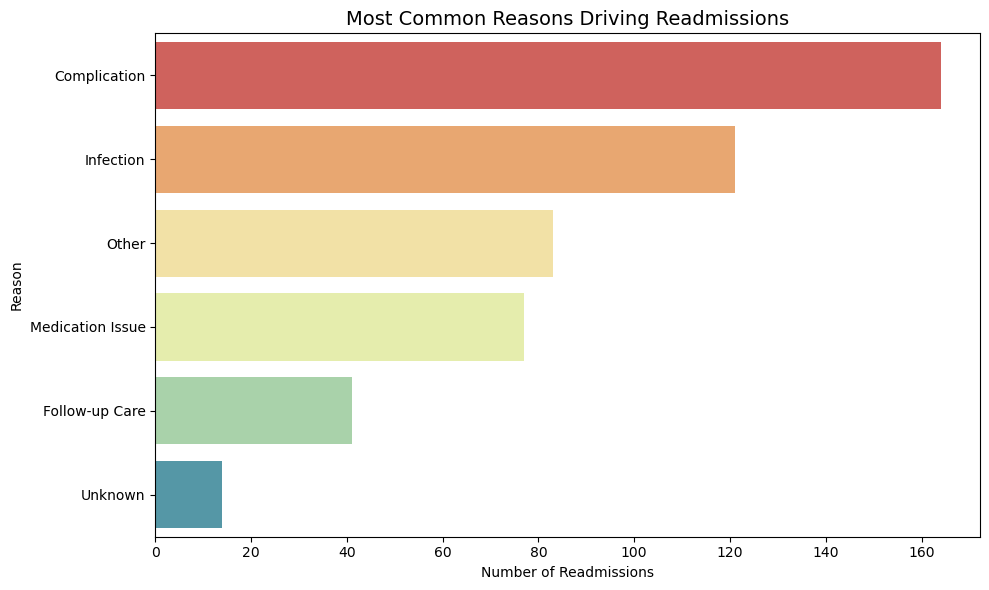

In [56]:
# Calculate the frequency of each reason
reason_counts = readmission['Reason_For_Readmission'].value_counts()

# Select the most common reasons
top_reasons = reason_counts

print("--- Top Reasons Driving Readmissions ---")
print(top_reasons)

# Visualization: Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_reasons.values,
    y=top_reasons.index,
    palette='Spectral',
    # Fix for Seaborn FutureWarning
    hue=top_reasons.index,
    legend=False
)

plt.title('Most Common Reasons Driving Readmissions', fontsize=14)
plt.xlabel('Number of Readmissions')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()

##### 6. How effective is our previous risk scoring tool at identifying patients who are actually readmitted?

In [57]:
# 1. Group the 'readmission' table by the Readmitted status (0 or 1)
# and calculate the mean of the Previous_Risk_Score for each group.
risk_score_effectiveness = readmission.groupby('Readmitted')['Previous_Risk_Score'].mean().round(2)

# 2. Extract the means for clear printing and comparison
# Using .get() ensures the code doesn't fail if one group (0 or 1) is missing
risk_not_readmitted = risk_score_effectiveness.get(0, "N/A (Group 0 not found)")
risk_readmitted = risk_score_effectiveness.get(1, "N/A (Group 1 not found)")

print("--- Effectiveness of Previous Risk Score Tool ---")
print(f"Average Risk Score for Patients NOT Readmitted (0): {risk_not_readmitted}")
print(f"Average Risk Score for Patients ACTUALLY Readmitted (1): {risk_readmitted}")

print("\n--- Evaluation ---")

# Provide a simple qualitative assessment based on the results:
if isinstance(risk_not_readmitted, float) and isinstance(risk_readmitted, float):
    if risk_readmitted > risk_not_readmitted * 1.15:
        print("✅ **HIGHLY EFFECTIVE.** The average score for readmitted patients is substantially higher (more than 15% difference), indicating strong predictive separation.")
    elif risk_readmitted > risk_not_readmitted:
        print("⚠️ **MODERATELY EFFECTIVE.** The average score is higher for readmitted patients, but the difference is small. The tool helps, but its predictive power is weak.")
    else:
        print("❌ **INEFFECTIVE.** The average risk score is similar or lower for the readmitted group, suggesting the tool fails to discriminate high-risk individuals.")
else:
    print("⚠️ **Data Limitation.** To fully evaluate, ensure your 'readmission' table contains both the Readmitted (1) and Not Readmitted (0) patients for a true comparative baseline.")

--- Effectiveness of Previous Risk Score Tool ---
Average Risk Score for Patients NOT Readmitted (0): N/A (Group 0 not found)
Average Risk Score for Patients ACTUALLY Readmitted (1): 7.78

--- Evaluation ---
⚠️ **Data Limitation.** To fully evaluate, ensure your 'readmission' table contains both the Readmitted (1) and Not Readmitted (0) patients for a true comparative baseline.


##### 7. Which departments have the highest readmission failure rates, indicating potential issues with their discharge protocols or patient education?

--- Department Readmission Failure Rates (Top 10) ---
  Admission_Department  Readmission_Rate (%)
0              Unknown             37.500000
1            Emergency             26.760563
2          Pulmonology             26.511628
3              Surgery             25.874126
4           Cardiology             24.433249
5     General Medicine             23.471883
6          Orthopedics             21.276596


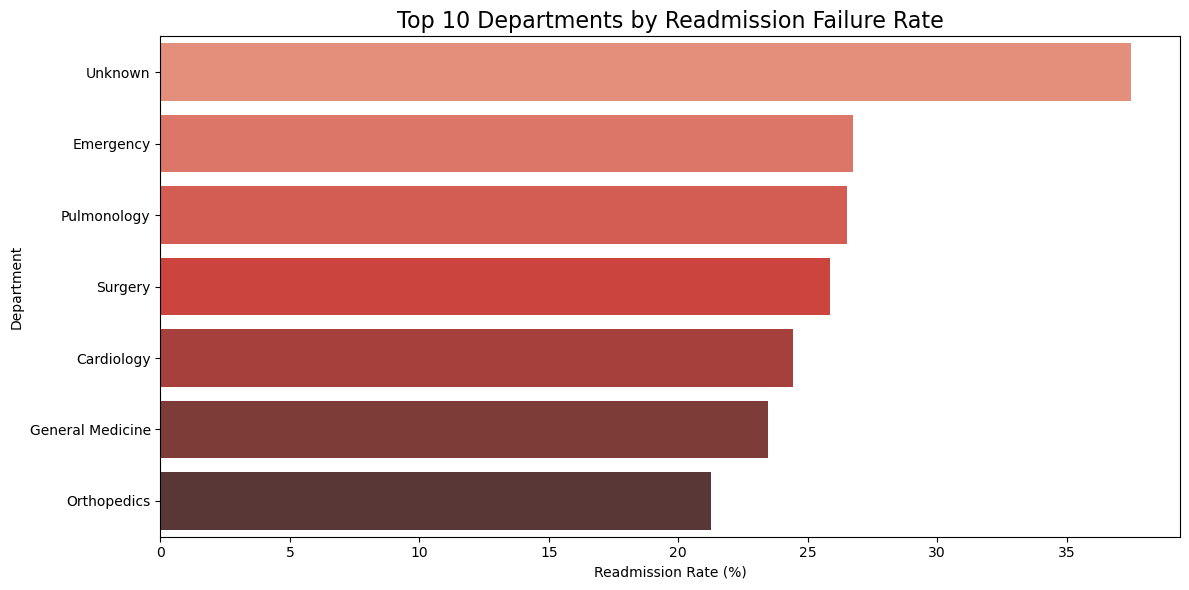

In [58]:
# 1. Identify all unique Patient_IDs that were readmitted (from the readmission table)
readmitted_ids = readmission['Patient_ID'].unique()

# 2. Flag the main 'patients' table: Is a patient readmitted (1) or not (0)?
# .isin() checks if the Patient_ID is in the list of readmitted IDs.
patients['Is_Readmitted'] = patients['Patient_ID'].isin(readmitted_ids).astype(int)

# 3. Group by department and calculate the mean of the 'Is_Readmitted' flag.
# The mean of a 1/0 column is the proportion/rate.
department_readmission_rate = (
    patients.groupby('Admission_Department')['Is_Readmitted'].mean() * 100
).sort_values(ascending=False)

# Convert to DataFrame for printing and plotting
rate_df = department_readmission_rate.reset_index(name='Readmission_Rate (%)')

# Select the top 10 for visualization
top_failure_rates = rate_df.head(10)

print("--- Department Readmission Failure Rates (Top 10) ---")
print(top_failure_rates)


# Visualization
plt.figure(figsize=(12, 6))

sns.barplot(
    x='Readmission_Rate (%)',
    y='Admission_Department',
    data=top_failure_rates,
    palette='Reds_d', # Use a strong palette to highlight failure
    # Fix for Seaborn FutureWarning
    hue='Admission_Department',
    legend=False
)

plt.title('Top 10 Departments by Readmission Failure Rate', fontsize=16)
plt.xlabel('Readmission Rate (%)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

##### 8. Which chronic patient populations are driving the largest volume of readmissions, requiring specialized post-discharge support?

--- Chronic Patient Populations Driving Readmissions (Top 8) ---
                   Readmission_Volume
Chronic_Condition                    
Hypertension                       89
Heart Disease                      79
Diabetes                           73
Kidney Disease                     64
COPD                               58


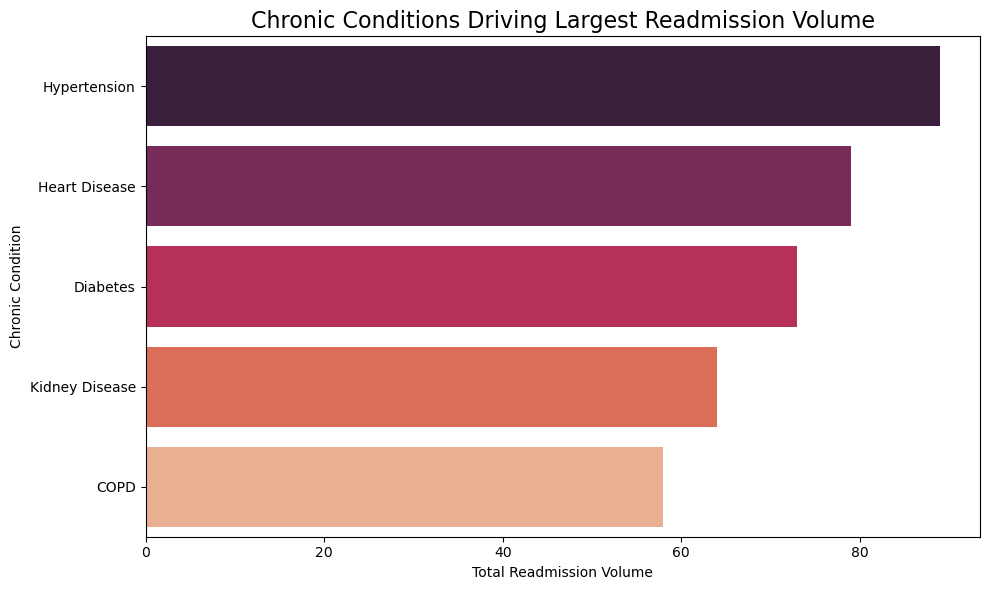

In [59]:
# 1. Identify all unique Patient_IDs that were readmitted
readmitted_ids = readmission['Patient_ID'].unique()

# 2. Flag the main 'patients' table: Is a patient readmitted (1) or not (0)?
patients['Is_Readmitted'] = patients['Patient_ID'].isin(readmitted_ids).astype(int)

# 3. Group by Chronic_Condition and sum the 'Is_Readmitted' flag (total volume)
readmission_volume_by_condition = (
    patients.groupby('Chronic_Condition')['Is_Readmitted'].sum()
).sort_values(ascending=False)

# 4. Filter out the 'None' category (patients without a chronic condition)
if 'None' in readmission_volume_by_condition.index:
    readmission_volume_by_condition = readmission_volume_by_condition.drop(labels=['None'])

# 5. Select the top 8 conditions driving volume
top_readmission_drivers = readmission_volume_by_condition.head(8)

# Convert to DataFrame for final printing/plotting
driver_df = top_readmission_drivers.reset_index(name='Readmission_Volume')

print("--- Chronic Patient Populations Driving Readmissions (Top 8) ---")
print(driver_df.set_index('Chronic_Condition'))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Readmission_Volume',
    y='Chronic_Condition',
    data=driver_df,
    palette='rocket',
    # Fix for Seaborn FutureWarning
    hue='Chronic_Condition',
    legend=False
)

plt.title('Chronic Conditions Driving Largest Readmission Volume', fontsize=16)
plt.xlabel('Total Readmission Volume')
plt.ylabel('Chronic Condition')
plt.tight_layout()
plt.show()

##### 9. What is the temporal pattern of readmissions (e.g.first 30 days) to optimize follow-up scheduling and post-discharge resource timing? 

--- Temporal Pattern of Readmissions (Days 1 to 30) ---
Mean Days Before Readmission: 16.60 days
Median Days Before Readmission: 17.00 days
Total Readmissions in Window: 111


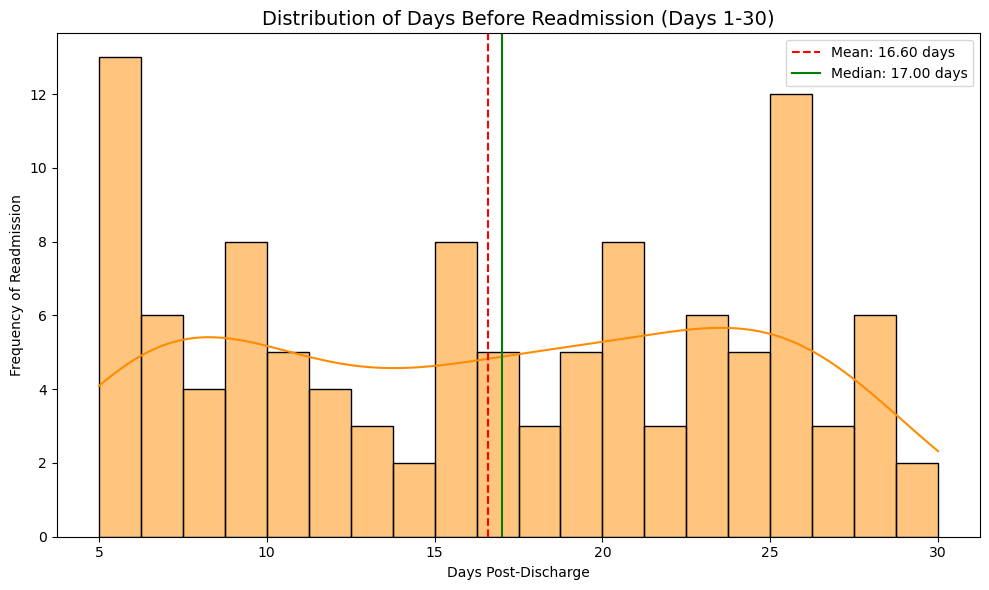

In [60]:
# Define the standard readmission window for analysis
WINDOW_DAYS = 30 

# Filter the data to focus on the standard readmission window 
readmission_in_window = readmission[readmission['Days_Before_Readmission'] <= WINDOW_DAYS]

# Calculate key statistics for central tendency
mean_days = readmission_in_window['Days_Before_Readmission'].mean()
median_days = readmission_in_window['Days_Before_Readmission'].median()

print("--- Temporal Pattern of Readmissions (Days 1 to 30) ---")
print(f"Mean Days Before Readmission: {mean_days:.2f} days")
print(f"Median Days Before Readmission: {median_days:.2f} days")
print(f"Total Readmissions in Window: {readmission_in_window.shape[0]}")

# Visualization: Histogram
plt.figure(figsize=(10, 6))

sns.histplot(
    readmission_in_window['Days_Before_Readmission'],
    bins=min(WINDOW_DAYS, 20), # Use up to 20 bins for clear distribution
    kde=True,
    color='darkorange',
    edgecolor='black'
)

# Add lines for mean and median
plt.axvline(mean_days, color='red', linestyle='--', label=f'Mean: {mean_days:.2f} days')
plt.axvline(median_days, color='green', linestyle='-', label=f'Median: {median_days:.2f} days')

plt.title(f'Distribution of Days Before Readmission (Days 1-{WINDOW_DAYS})', fontsize=14)
plt.xlabel('Days Post-Discharge')
plt.ylabel('Frequency of Readmission')
plt.legend()
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **3. Hospital Operations**

##### 1. What is the hospital's average patient wait time, and how does this compare to our service-level target (e.g., aiming for < 30 minutes)?

--- Overall Hospital Average Wait Time Analysis ---
The hospital's unweighted average patient wait time is: 37.0 minutes.

--- Service-Level Target Evaluation ---
❌ RED: Target Missed!
The average wait time (37.0 minutes) exceeds the 30-minute target. Immediate intervention is required.

--- Departmental Wait Times (Longest to Shortest) ---
                  Avg_Wait_Time_Minutes
Department                             
Cardiology                           49
Orthopedics                          49
Pulmonology                          49
General Medicine                     45
Emergency                            18
Surgery                              12


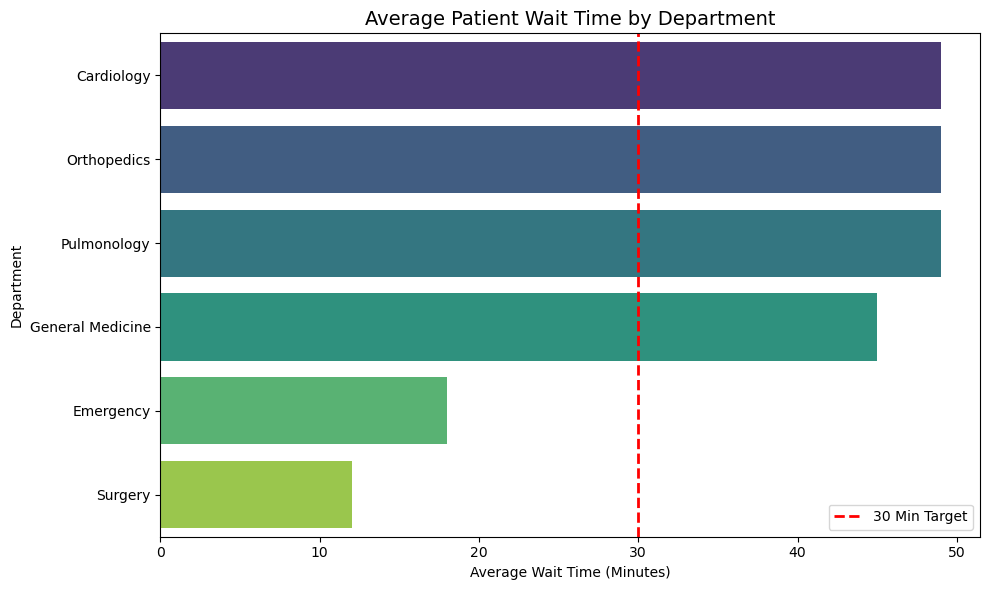

In [62]:
# 1. Calculate the overall average wait time by taking the mean of the department averages
# (This is an unweighted average since patient volume per department is not available)
overall_average_wait_time = operations['Avg_Wait_Time_Minutes'].mean()

# 2. Define the service-level target
TARGET_WAIT_TIME = 30.0

print("--- Overall Hospital Average Wait Time Analysis ---")
print(f"The hospital's unweighted average patient wait time is: {overall_average_wait_time:.1f} minutes.")

print("\n--- Service-Level Target Evaluation ---")

# 3. Perform the comparison and provide the indicator
if overall_average_wait_time <= TARGET_WAIT_TIME:
    print(f"✅ GREEN: Target Met!")
    print(f"The average wait time ({overall_average_wait_time:.1f} minutes) is below the {TARGET_WAIT_TIME:.0f}-minute target.")
else:
    print(f"❌ RED: Target Missed!")
    print(f"The average wait time ({overall_average_wait_time:.1f} minutes) exceeds the {TARGET_WAIT_TIME:.0f}-minute target. Immediate intervention is required.")

# Visualization
# Sort the data by wait time (longest at the top)
departmental_waits = operations[['Department', 'Avg_Wait_Time_Minutes']].sort_values(
    by='Avg_Wait_Time_Minutes', ascending=False
)

print("\n--- Departmental Wait Times (Longest to Shortest) ---")
print(departmental_waits.set_index('Department'))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Avg_Wait_Time_Minutes',
    y='Department',
    data=departmental_waits,
    palette='viridis',
    # Fix for Seaborn FutureWarning
    hue='Department'
)

# Add the 30-minute target line
plt.axvline(30, color='red', linestyle='--', linewidth=2, label='30 Min Target')

plt.title('Average Patient Wait Time by Department', fontsize=14)
plt.xlabel('Average Wait Time (Minutes)')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()
plt.show()

##### 2. What is the hospital's current average bed utilization rate, and are we operating near maximum capacity (e.g., $85\%$) which could lead to overcrowding and patient flow issues?

--- Overall Bed Utilization Analysis ---
Total Bed Capacity: 305
Total Beds Occupied: 207
Overall Bed Utilization Rate: 67.9%

✅ Hospital operating within a comfortable range (below 85%).

--- Departmental Bed Utilization Rates ---
                  Utilization_Rate (%)
Department                            
Emergency                         79.7
Pulmonology                       75.6
Orthopedics                       75.4
General Medicine                  66.7
Cardiology                        52.4
Surgery                           51.0


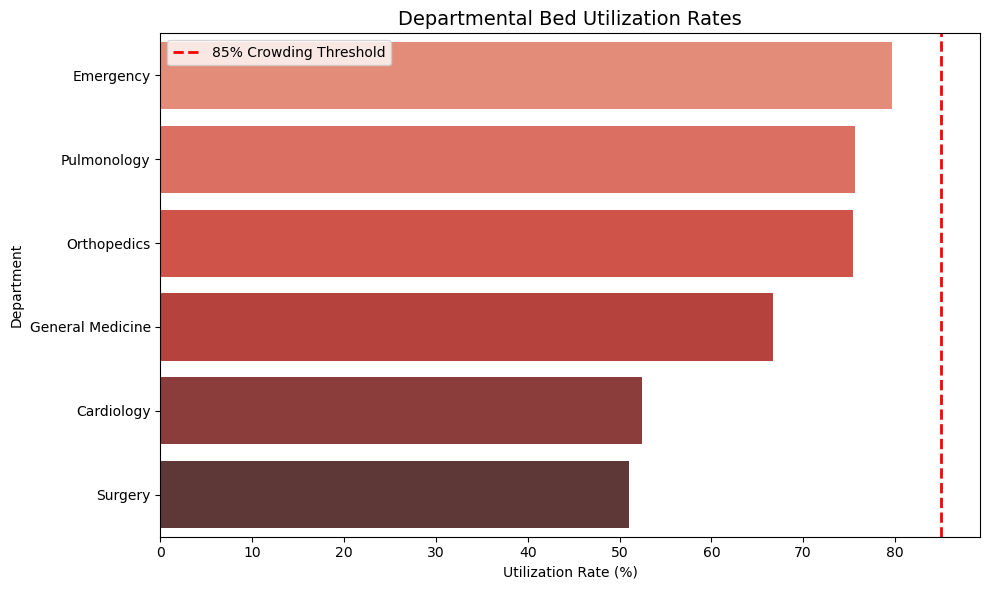

In [63]:
# --- PART 1: OVERALL UTILIZATION CALCULATION ---

# 2. Calculate Total Capacity and Total Occupied
total_capacity = operations['Bed_Capacity'].sum()
total_occupied = operations['Beds_Occupied'].sum()

# 3. Calculate the overall utilization rate
utilization_rate = (total_occupied / total_capacity) * 100

# 4. Define the crowding threshold (standard benchmark is often 85%)
CROWDING_THRESHOLD = 85.0

print("--- Overall Bed Utilization Analysis ---")
print(f"Total Bed Capacity: {total_capacity}")
print(f"Total Beds Occupied: {total_occupied}")
print(f"Overall Bed Utilization Rate: {utilization_rate:.1f}%")

# 5. Assessment
if utilization_rate >= CROWDING_THRESHOLD:
    print(f"\n⚠️ WARNING: Hospital operating near or above {CROWDING_THRESHOLD:.0f}% capacity.")
else:
    print(f"\n✅ Hospital operating within a comfortable range (below {CROWDING_THRESHOLD:.0f}%).")


# --- PART 2: DEPARTMENTAL UTILIZATION & VISUALIZATION ---

# 6. Calculate departmental utilization
operations['Utilization_Rate (%)'] = (operations['Beds_Occupied'] / operations['Bed_Capacity']) * 100

# 7. Sort and display departmental utilization
departmental_utilization = operations[['Department', 'Utilization_Rate (%)']].sort_values(
    by='Utilization_Rate (%)', ascending=False
).round(1)

print("\n--- Departmental Bed Utilization Rates ---")
print(departmental_utilization.set_index('Department'))

# 8. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Utilization_Rate (%)',
    y='Department',
    data=departmental_utilization,
    palette='Reds_d',
    hue='Department'
)
# Add the 85% crowding threshold line
plt.axvline(CROWDING_THRESHOLD, color='red', linestyle='--', linewidth=2, label=f'{CROWDING_THRESHOLD:.0f}% Crowding Threshold')

plt.title('Departmental Bed Utilization Rates', fontsize=14)
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()
plt.show()

##### 3. What is the total volume of discharge delays occurring across the hospital, indicating administrative or process failures?

Total Volume of Discharge Delays: 29

--- Departmental Discharge Delays (Volume) ---
                  Discharge_Delays
Department                        
General Medicine                 6
Cardiology                       5
Pulmonology                      5
Surgery                          5
Emergency                        4
Orthopedics                      4


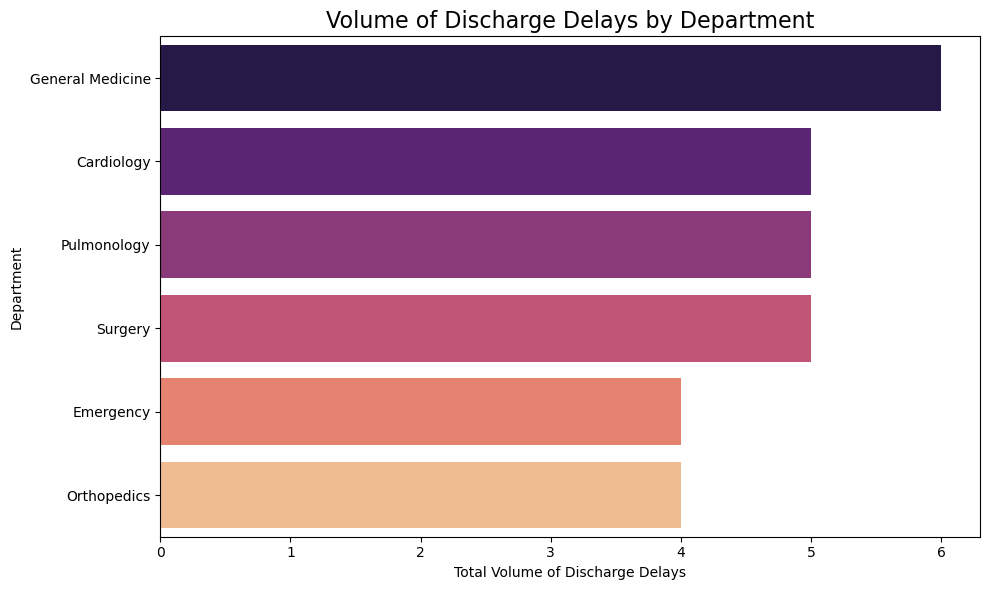

In [65]:
# Calculate the total volume of discharge delays
total_discharge_delays = operations['Discharge_Delays'].sum()

print(f"Total Volume of Discharge Delays: {total_discharge_delays}")

# Also, provide a departmental breakdown for actionability
departmental_delays = operations[['Department', 'Discharge_Delays']].sort_values(
    by='Discharge_Delays', ascending=False
)
print("\n--- Departmental Discharge Delays (Volume) ---")
print(departmental_delays.set_index('Department'))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Discharge_Delays',
    y='Department',
    data=departmental_delays,
    palette='magma', # Use a strong palette
    # Fix for Seaborn FutureWarning
    hue='Department',
    legend=False
)

plt.title('Volume of Discharge Delays by Department', fontsize=16)
plt.xlabel('Total Volume of Discharge Delays')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

##### 4. Which specific departments are experiencing the highest bed utilization rates, and are these constraints localized or hospital-wide?


--- Departmental Bed Utilization Rates (Highest to Lowest) ---
                  Utilization_Rate (%)
Department                            
Emergency                         79.7
Pulmonology                       75.6
Orthopedics                       75.4
General Medicine                  66.7
Cardiology                        52.4
Surgery                           51.0


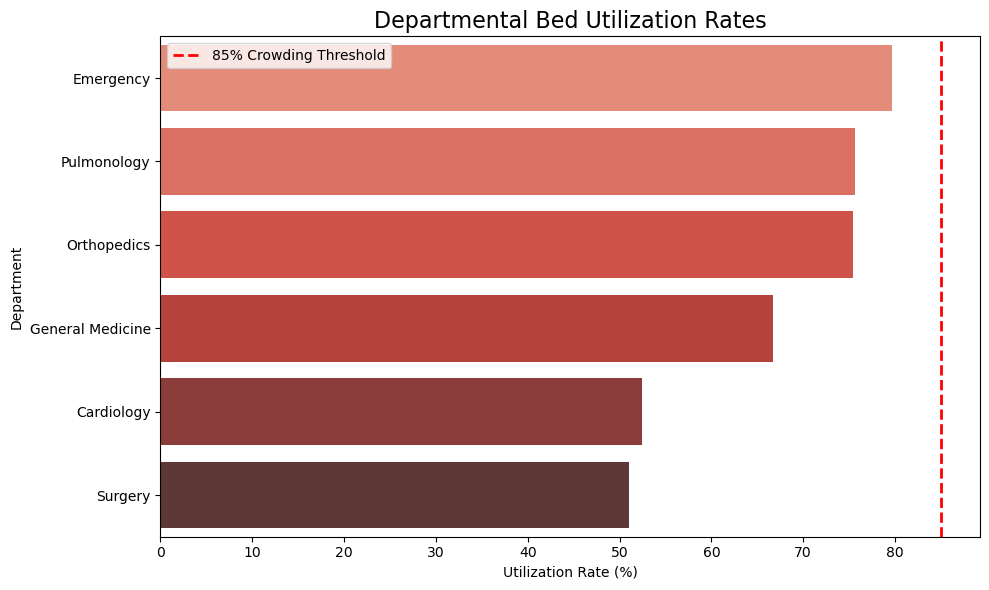

In [67]:
# Calculate departmental utilization rate (if not already done)
operations['Utilization_Rate (%)'] = (operations['Beds_Occupied'] / operations['Bed_Capacity']) * 100

# Sort the data for visualization (highest rates at the top)
departmental_utilization = operations[['Department', 'Utilization_Rate (%)']].sort_values(
    by='Utilization_Rate (%)', ascending=False
).round(1)

print("\n--- Departmental Bed Utilization Rates (Highest to Lowest) ---")
print(departmental_utilization.set_index('Department'))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Utilization_Rate (%)',
    y='Department',
    data=departmental_utilization,
    palette='Reds_d',
    hue='Department',
    legend=False
)

# Define the standard 85% crowding threshold
CROWDING_THRESHOLD = 85.0

# Add the 85% crowding threshold line
plt.axvline(CROWDING_THRESHOLD, color='red', linestyle='--', linewidth=2, label=f'{CROWDING_THRESHOLD:.0f}% Crowding Threshold')

plt.title('Departmental Bed Utilization Rates', fontsize=16)
plt.xlabel('Utilization Rate (%)')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()
plt.show()

##### 5. Are high wait times correlated with long treatment times in specific departments, or are they separate issues that require different operational interventions?

--- Correlation Analysis ---
Correlation (r) between Avg Wait Time and Avg Treatment Time: 0.51

--- Interpretation ---
⚠️ Strong Positive Correlation: High wait times are strongly linked to long treatment times. Intervention should focus on bottlenecks in treatment completion and discharge.


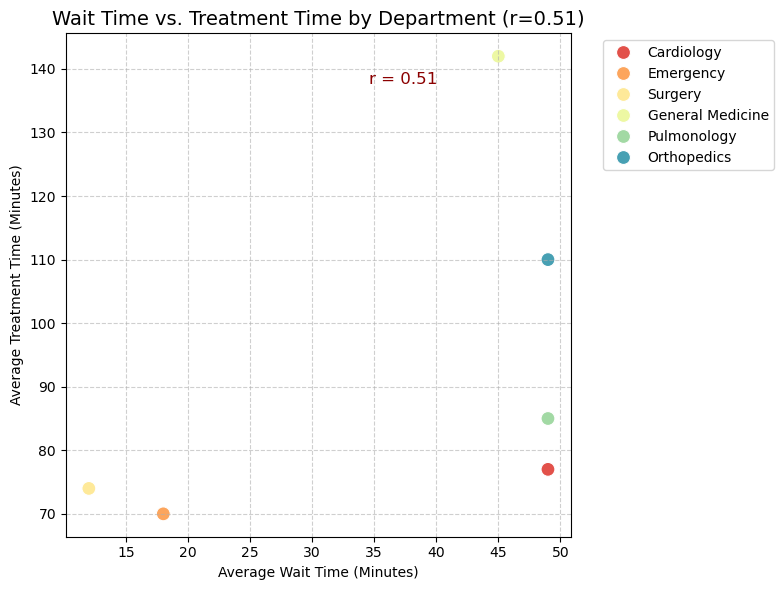

In [68]:
# --- 1. Calculate the Correlation Coefficient ---

# Select the two columns and calculate the Pearson correlation (r)
correlation = operations['Avg_Wait_Time_Minutes'].corr(operations['Avg_Treatment_Time_Minutes'])

print("--- Correlation Analysis ---")
print(f"Correlation (r) between Avg Wait Time and Avg Treatment Time: {correlation:.2f}")

# --- 2. Interpret the Correlation ---
print("\n--- Interpretation ---")
if correlation > 0.5:
    print("⚠️ Strong Positive Correlation: High wait times are strongly linked to long treatment times. Intervention should focus on bottlenecks in treatment completion and discharge.")
elif correlation < -0.5:
    print("⚠️ Strong Negative Correlation: Departments with long waits tend to have short treatment times (rare).")
elif 0.2 < correlation < 0.5:
    print("✅ Weak to Moderate Positive Correlation: Some relationship exists, but they are largely separate issues.")
else:
    print("✅ Weak/No Significant Correlation: They are likely separate issues requiring distinct operational interventions.")


# --- 3. Visualization: Scatter Plot ---

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Avg_Wait_Time_Minutes',
    y='Avg_Treatment_Time_Minutes',
    data=operations,
    hue='Department', # Color-code by department for granular insight
    s=100, # Size of dots
    palette='Spectral'
)

plt.title(f'Wait Time vs. Treatment Time by Department (r={correlation:.2f})', fontsize=14)
plt.xlabel('Average Wait Time (Minutes)')
plt.ylabel('Average Treatment Time (Minutes)')

# Add a text label showing the correlation coefficient
plt.annotate(f'r = {correlation:.2f}',
             xy=(0.6, 0.9), xycoords='axes fraction',
             fontsize=12, color='darkred')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 6. Is our staff-to-bed ratio appropriate across departments, or do certain areas have a resource imbalance (e.g., too few nurses per bed) that could be contributing to operational delays?

--- Staff-to-Bed Ratio by Department ---
Hospital Average Staff-to-Bed Ratio: 1.16

Ratio Breakdown (Highest Staffing per Bed to Lowest):
                  Staff_to_Bed_Ratio
Department                          
Pulmonology                     2.00
Cardiology                      1.43
Surgery                         1.41
Emergency                       1.08
Orthopedics                     0.57
General Medicine                0.50


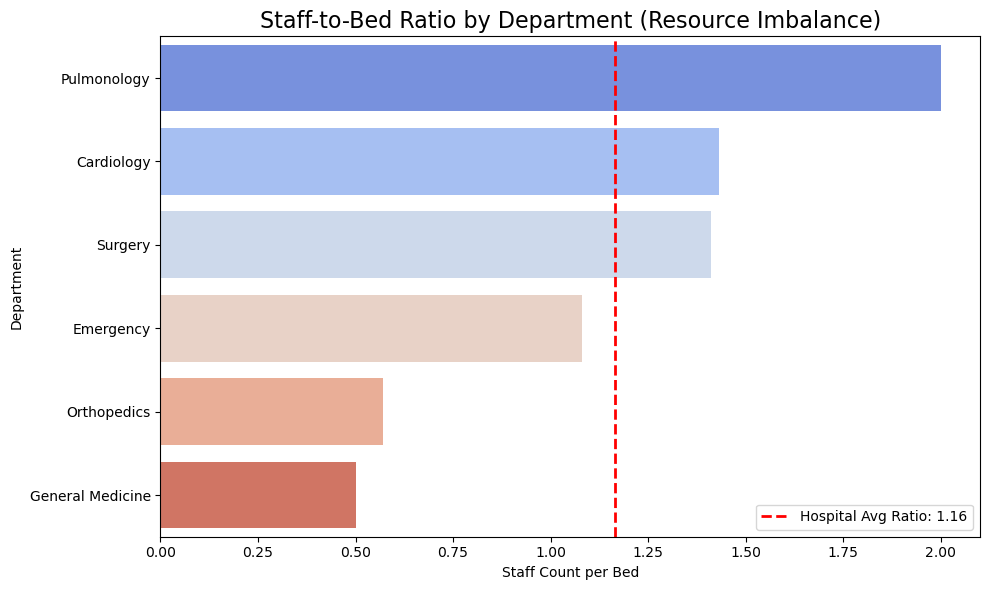

In [69]:
# --- 1. Calculate Staff-to-Bed Ratio ---

# The ratio is Staff_Count divided by Bed_Capacity. 
# A HIGHER ratio means MORE staff per bed (better staffing).
operations['Staff_to_Bed_Ratio'] = operations['Staff_Count'] / operations['Bed_Capacity']

# 2. Calculate the hospital-wide average ratio for comparison (the benchmark)
hospital_avg_ratio = operations['Staff_to_Bed_Ratio'].mean()

# 3. Sort and display the ratios (highest ratio = most staffed)
staffing_ratios = operations[['Department', 'Staff_to_Bed_Ratio']].sort_values(
    by='Staff_to_Bed_Ratio', ascending=False
).round(2)

print("--- Staff-to-Bed Ratio by Department ---")
print(f"Hospital Average Staff-to-Bed Ratio: {hospital_avg_ratio:.2f}")
print("\nRatio Breakdown (Highest Staffing per Bed to Lowest):")
print(staffing_ratios.set_index('Department'))

# 4. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Staff_to_Bed_Ratio',
    y='Department',
    data=staffing_ratios,
    palette='coolwarm', # Use a diverging palette to highlight difference from average
    hue='Department',
    legend=False
)

# Add the hospital-wide average line
plt.axvline(hospital_avg_ratio, color='red', linestyle='--', linewidth=2, label=f'Hospital Avg Ratio: {hospital_avg_ratio:.2f}')

plt.title('Staff-to-Bed Ratio by Department (Resource Imbalance)', fontsize=16)
plt.xlabel('Staff Count per Bed')
plt.ylabel('Department')
plt.legend()
plt.tight_layout()
plt.show()

##### 7. Which departments are the primary drivers of discharge delays, and is this problem consistent or clustered in a few specific areas?

Total Volume of Discharge Delays Across Hospital: 29

--- Departmental Discharge Delays (Highest to Lowest) ---
                  Discharge_Delays
Department                        
General Medicine                 6
Cardiology                       5
Pulmonology                      5
Surgery                          5
Emergency                        4
Orthopedics                      4


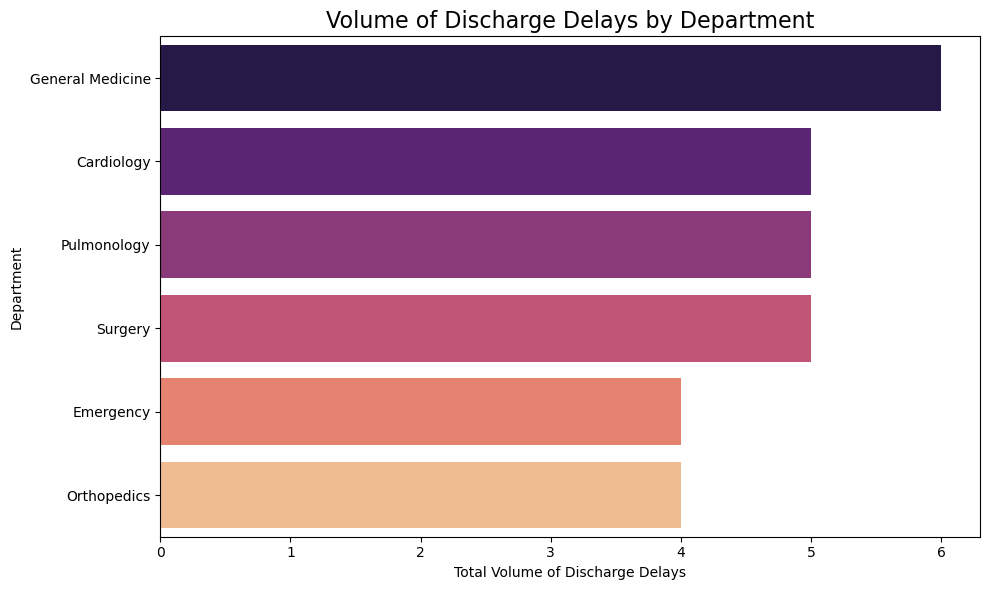

In [70]:
# Calculate the total volume of discharge delays
total_discharge_delays = operations['Discharge_Delays'].sum()

# Create the departmental breakdown (Primary Drivers)
departmental_delays = operations[['Department', 'Discharge_Delays']].sort_values(
    by='Discharge_Delays', ascending=False
)

print(f"Total Volume of Discharge Delays Across Hospital: {total_discharge_delays}")

print("\n--- Departmental Discharge Delays (Highest to Lowest) ---")
print(departmental_delays.set_index('Department'))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Discharge_Delays',
    y='Department',
    data=departmental_delays,
    palette='magma',
    hue='Department'
)

plt.title('Volume of Discharge Delays by Department', fontsize=16)
plt.xlabel('Total Volume of Discharge Delays')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

##### 8. Is there a clear relationship between a department's staff count and the frequency of discharge delays? Does insufficient staffing correlate with increased administrative backlog?

--- Correlation Analysis: Staff Count vs. Discharge Delays ---
Pearson Correlation (r): -0.32

--- Assessment ---
✅ Weak/No Significant Linear Correlation: Staff count (volume) and discharge delays are largely independent issues.


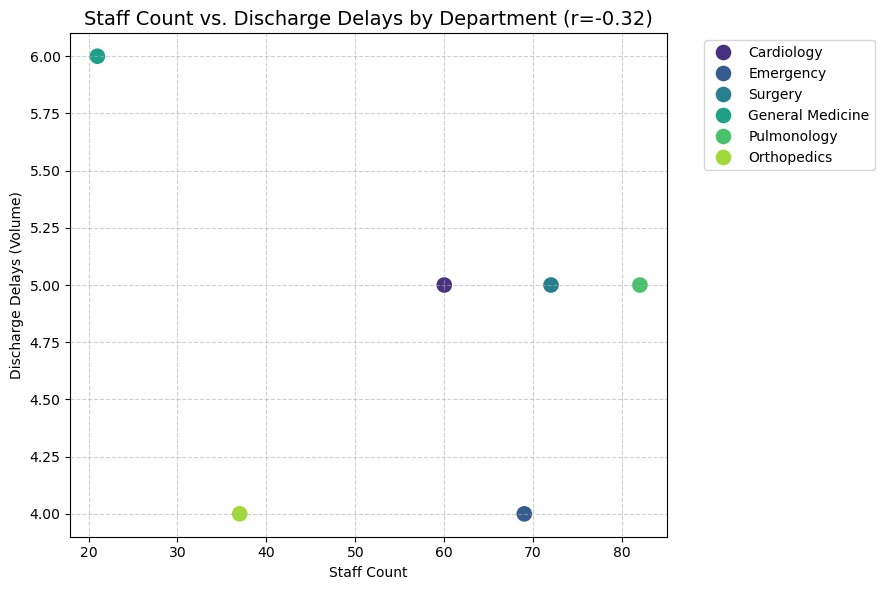

In [71]:
# Calculate the Pearson Correlation Coefficient (r)
# Note: A strong negative correlation (r < -0.5) would support the hypothesis.
correlation = operations['Staff_Count'].corr(operations['Discharge_Delays'])

print("--- Correlation Analysis: Staff Count vs. Discharge Delays ---")
print(f"Pearson Correlation (r): {correlation:.2f}")

# Assessment
print("\n--- Assessment ---")
if correlation < -0.5:
    print("⚠️ Strong Negative Correlation: Insufficient staffing (low staff count) is strongly associated with high discharge delays.")
elif correlation > 0.5:
    print("⚠️ Strong Positive Correlation: High staffing is associated with high discharge delays.")
else:
    print("✅ Weak/No Significant Linear Correlation: Staff count (volume) and discharge delays are largely independent issues.")

# Visualization: Scatter Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    x='Staff_Count',
    y='Discharge_Delays',
    data=operations,
    hue='Department', # Color-code by department for granularity
    s=150,
    palette='viridis'
)

plt.title(f'Staff Count vs. Discharge Delays by Department (r={correlation:.2f})', fontsize=14)
plt.xlabel('Staff Count')
plt.ylabel('Discharge Delays (Volume)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()